In [4]:
import pandas as pd

In [6]:
dataset = pd.read_csv('C:/Users/Usuario/Downloads/admission_dataset.csv')

In [7]:
dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,315,105,3,2.0,2.5,8.48,0,0.75
1,321,112,5,5.0,5.0,9.06,1,0.86
2,327,103,3,4.0,4.0,8.30,1,0.74
3,305,112,3,3.0,3.5,8.65,0,0.71
4,297,96,2,2.5,1.5,7.89,0,0.43
...,...,...,...,...,...,...,...,...
395,320,111,4,4.5,3.5,8.87,1,0.85
396,305,103,2,2.5,3.5,8.13,0,0.59
397,305,107,2,2.5,2.5,8.42,0,0.71
398,320,104,3,3.0,2.5,8.57,1,0.74


In [9]:
y = dataset['Chance of Admit ']
x = dataset.drop("Chance of Admit ", axis = 1)

x_treino, x_teste = x[0:300], x[300:]
y_treino, y_teste = y[0:300], y[300:]

In [11]:
x_teste.shape

(100, 7)

In [18]:
!pip install keras

In [22]:
!pip install tensorflow

In [27]:
from keras.models import Sequential
from keras.layers import Dense

modelo = Sequential()
modelo.add(Dense(units=3, activation="relu", input_dim=7))
modelo.add(Dense(units=1,activation="linear"))

modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
resultado = modelo.fit(x_treino, y_treino, epochs=200, batch_size=32, validation_data=(x_teste, y_teste))

Epoch 1/200
10/10 [==============================] - 0s 15ms/step - loss: 950.8197 - mae: 30.7901 - val_loss: 877.0134 - val_mae: 29.5841
Epoch 2/200
10/10 [==============================] - 0s 4ms/step - loss: 812.7010 - mae: 28.4683 - val_loss: 748.6036 - val_mae: 27.3322
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 693.6433 - mae: 26.2972 - val_loss: 638.5671 - val_mae: 25.2432
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 591.7981 - mae: 24.2928 - val_loss: 545.5804 - val_mae: 23.3326
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 506.1052 - mae: 22.4656 - val_loss: 467.3480 - val_mae: 21.5946
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 434.2082 - mae: 20.8073 - val_loss: 401.6353 - val_mae: 20.0185
Epoch 7/200
10/10 [==============================] - 0s 4ms/step - loss: 373.8124 - mae: 19.3045 - val_loss: 346.4298 - val_mae: 18.5914
Epoch 8/200
10/10 [=====================

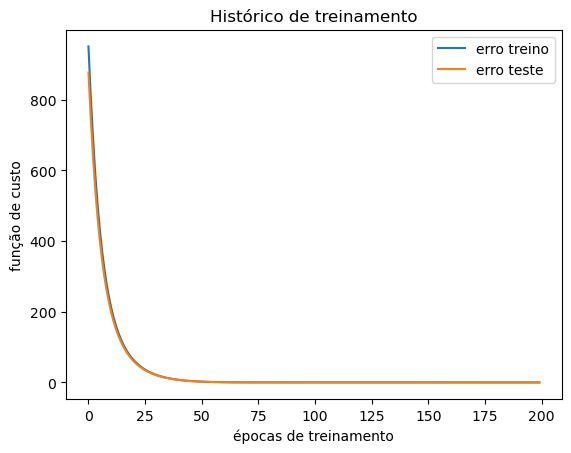

In [30]:
import matplotlib.pyplot as plt

plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de treinamento')
plt.ylabel('função de custo')
plt.xlabel('épocas de treinamento')
plt.legend(['erro treino', 'erro teste'])
plt.show()                           